In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sleep_df = pd.read_csv('PillowData_SEBAS.csv', sep=';')

## Vamos a crear una funcion para limpiar los column_names

In [182]:
def clean_header(val):
    if isinstance(val, str):
#       ELIMINANDO CARACTERES ESPECIALES
        val = "".join(char for char in val if char.isalnum() or char in (' ', '_'))
#       ELIMINANDO ESPACIOS
        val = val.strip().lower().replace(" ", '_')

        return val
    else:
        return val

In [183]:
sleep_df_clean = sleep_df.loc[sleep_df['Is nap'] == 'No']
sleep_df_clean = sleep_df_clean.rename(columns=clean_header)

## Aca comienza el codigo del <font color='orange'> EDA

#### <font color='white'> Limpiando los datos para poder procesarlos

In [184]:
from dataclasses import replace

sleep_df_clean['start_time']=sleep_df_clean['start_time'].apply(lambda x: x.replace('Optional', '').replace('(', '').replace(')', '').replace('+0000', ''))
sleep_df_clean['end_time']=sleep_df_clean['end_time'].apply(lambda x: x.replace('Optional', '').replace('(', '').replace(')', '').replace('+0000', ''))

In [185]:
sleep_df_clean['start_time'] =  pd.to_datetime(sleep_df_clean['start_time'], format='%Y-%m-%d')
sleep_df_clean['end_time'] =  pd.to_datetime(sleep_df_clean['end_time'], format='%Y-%m-%d')
sleep_df_clean['horas_dormido'] = round(sleep_df_clean['time_in_bed_mns']/60, 1)
sleep_df_clean.drop(columns=['is_nap','amount_of_audio_recordings'], inplace=True)
sleep_df_clean = sleep_df_clean[['start_time','end_time', 'horas_dormido','sleep_quality','awake_duratin_mins','rem_sleep_duration_mins','light_sleep_duration_mins','deep_sleep_duration_mins', 'wakeup_mood']]

In [186]:
sleep_df_clean['start_time'] = sleep_df_clean.start_time.dt.strftime('%d-%mm-%Y')
sleep_df_clean.start_time = pd.to_datetime(sleep_df_clean.start_time, format='%d-%mm-%Y')
sleep_df_clean.drop(columns='end_time', inplace=True)
sleep_df_index = sleep_df_clean.set_index(sleep_df_clean.start_time).drop(columns='start_time')

In [213]:
sleep_df_index.drop(columns='wakeup_mood', inplace=True)
sleep_df_index.head(5)

,horas_dormido,sleep_quality,awake_duratin_mins,rem_sleep_duration_mins,light_sleep_duration_mins,deep_sleep_duration_mins
start_time,,,,,,
2021-08-18,8.1,90,56,106,170,152
2021-08-19,3.8,46,29,31,76,93
2021-08-20,6.5,45,118,40,104,126
2021-08-21,7.4,90,41,121,151,132
2021-08-22,9.2,85,57,101,235,157


#### <font color='pink'> Finalizada la limpieza, hora de plotear y jugar con los datos

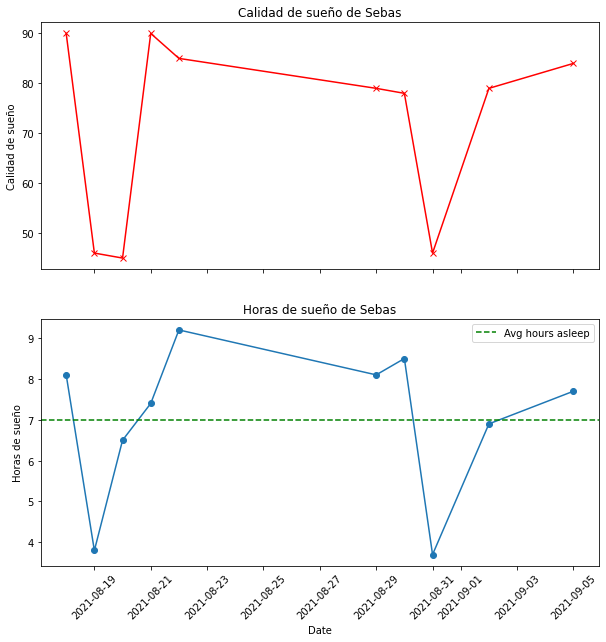

In [231]:
# CREANDO SUBPLOLTS

from turtle import color


fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10,10)

ax[0].plot(sleep_df_index.sleep_quality.head(10), marker='x', color='red')
ax[0].set_ylabel("Calidad de sueño")
ax[0].set_title("Calidad de sueño de Sebas")

ax[1].plot(sleep_df_index.horas_dormido.head(10), marker='o')
ax[1].axhline(y=round(sleep_df_index.horas_dormido.head(10).mean(),1), color='green', linestyle='--', label='Avg hours asleep')
ax[1].set_ylabel("Horas de sueño")
ax[1].set_title("Horas de sueño de Sebas")

plt.legend()
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.show()

### <font color='#87CEEB'> Seccionamos por mes, semana, e identificamos el momento el que comienza a tomar CBD

In [253]:
sleep_df_grouped = sleep_df_clean.groupby(pd.Grouper(key='start_time', axis=0, 
                      freq='M', sort=True)).mean()
sleep_df_grouped = sleep_df_grouped.apply(lambda x: round(x, 1))
sleep_df_grouped.fillna(method='ffill', inplace=True)

### <font color='#90EE90'> OBTENIENDO TODAS LAS GRAFICAS

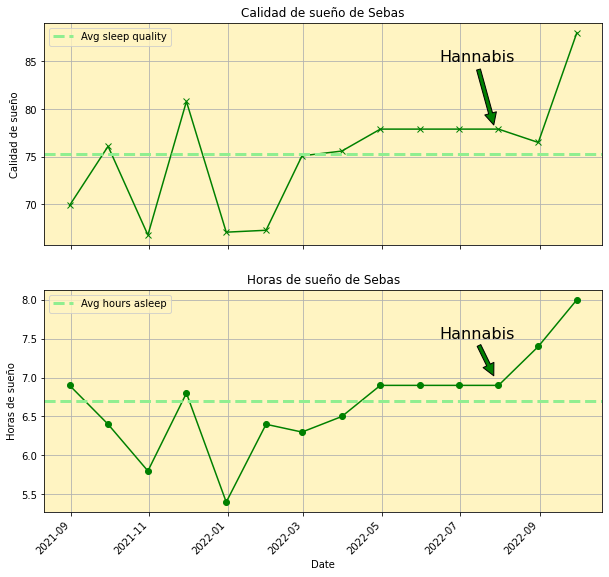

<Figure size 432x288 with 0 Axes>

In [340]:
from datetime import datetime
from matplotlib import dates as mdates

fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10,10)

ax[0].plot(sleep_df_grouped.sleep_quality, marker='x', color='GREEN')
ax[0].set_ylabel("Calidad de sueño")
ax[0].set_title("Calidad de sueño de Sebas")
ax[0].grid(True)
ax[0].axhline(y=round(sleep_df_grouped.sleep_quality.mean(),1), color='#90EE90', linestyle='--', 
                        label='Avg sleep quality', linewidth=3)
ax[0].legend()
ax[0].annotate(text='Hannabis', xy=(mdates.date2num(datetime(2022, 7, 28)),78), 
              xytext=(mdates.date2num(datetime(2022, 6, 15)),85), arrowprops=dict(facecolor='green', shrink=0.05), fontsize=16)


ax[1].plot(sleep_df_grouped.horas_dormido, color= 'green', marker='o')
ax[1].axhline(y=round(sleep_df_grouped.horas_dormido.mean(),1), color='#90EE90', linestyle='--', 
                        label='Avg hours asleep', linewidth=3)
ax[1].set_ylabel("Horas de sueño")
ax[1].set_title("Horas de sueño de Sebas")
ax[1].grid(True)
ax[1].annotate(text='Hannabis', xy=(mdates.date2num(datetime(2022, 7, 28)),7), 
              xytext=(mdates.date2num(datetime(2022, 6, 15)),7.5), arrowprops=dict(facecolor='green', shrink=0.05), fontsize=16)

fig.autofmt_xdate()
plt.legend()
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.show()
plt.savefig('Horas de sueño y calidad de sueño.png')

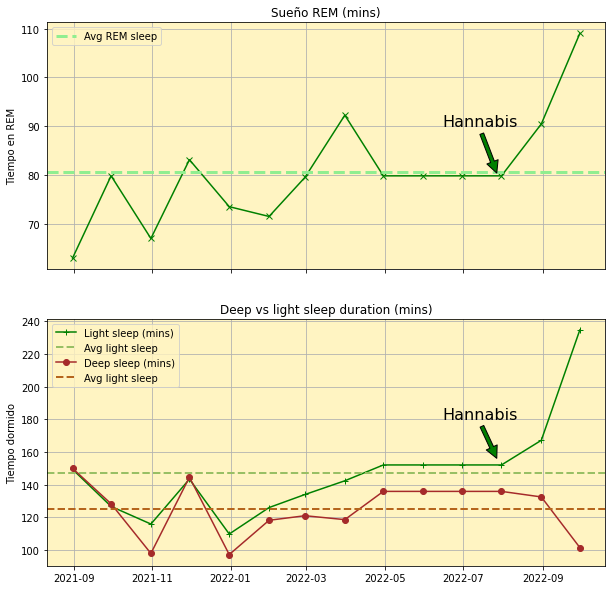

<Figure size 432x288 with 0 Axes>

In [338]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10,10)

ax[0].plot(sleep_df_grouped.rem_sleep_duration_mins, marker='x', color='GREEN')
ax[0].set_ylabel("Tiempo en REM")
ax[0].set_title("Sueño REM (mins)")
ax[0].grid(True)
ax[0].axhline(y=round(sleep_df_grouped.rem_sleep_duration_mins.mean(),1), color='#90EE90', linestyle='--', 
                        label='Avg REM sleep', linewidth=3)
ax[0].legend()
ax[0].annotate(text='Hannabis', xy=(mdates.date2num(datetime(2022, 7, 28)),80), 
              xytext=(mdates.date2num(datetime(2022, 6, 15)),90), arrowprops=dict(facecolor='green', shrink=0.05), fontsize=16)


ax[1].plot(sleep_df_grouped.light_sleep_duration_mins, label='Light sleep (mins)', marker='+', color='green')
ax[1].axhline(y=round(sleep_df_grouped.light_sleep_duration_mins.mean(),1), color='#98bf64', linestyle='--', 
                        label='Avg light sleep', linewidth=2)

ax[1].plot(sleep_df_grouped.deep_sleep_duration_mins, label='Deep sleep (mins)', marker='o', color='brown')
ax[1].axhline(y=round(sleep_df_grouped.deep_sleep_duration_mins.mean(),1), color='#b5651d', linestyle='--', 
                        label='Avg light sleep', linewidth=2)

ax[1].set_ylabel("Tiempo dormido")
ax[1].set_title("Deep vs light sleep duration (mins)")
ax[1].grid(True)
ax[1].annotate(text='Hannabis', xy=(mdates.date2num(datetime(2022, 7, 28)),155), 
              xytext=(mdates.date2num(datetime(2022, 6, 15)),180), arrowprops=dict(facecolor='green', shrink=0.05), fontsize=16)
ax[1].legend()
plt.show()
plt.savefig('Tiempo en REM-Deep-Light sleep.png')